In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
data = pd.read_csv('Day5shopping.csv')
data

,Customer ID,Age,Gender,Purchase Amount (USD),Review Rating,Subscription Status,Previous Purchases,Frequency of Purchases
0,1,55,Male,53,3.1,Yes,14,Fortnightly
1,2,19,Male,64,3.1,Yes,2,Fortnightly
2,3,50,Male,73,3.1,Yes,23,Weekly
3,4,21,Male,90,3.5,Yes,49,Weekly
4,5,45,Male,49,2.7,Yes,31,Annually
...,...,...,...,...,...,...,...,...
3895,3896,40,Female,28,4.2,No,32,Weekly
3896,3897,52,Female,49,4.5,No,41,Bi-Weekly
3897,3898,46,Female,33,2.9,No,24,Quarterly
3898,3899,44,Female,77,3.8,No,24,Weekly


In [148]:
data.head()

,Customer ID,Age,Gender,Purchase Amount (USD),Review Rating,Subscription Status,Previous Purchases,Frequency of Purchases
0,1,55,Male,53,3.1,Yes,14,Fortnightly
1,2,19,Male,64,3.1,Yes,2,Fortnightly
2,3,50,Male,73,3.1,Yes,23,Weekly
3,4,21,Male,90,3.5,Yes,49,Weekly
4,5,45,Male,49,2.7,Yes,31,Annually


In [149]:
data.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Purchase Amount (USD)     0
Review Rating             0
Subscription Status       0
Previous Purchases        0
Frequency of Purchases    0
dtype: int64

In [150]:
data=data.fillna(method='bfill')
data.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Purchase Amount (USD)     0
Review Rating             0
Subscription Status       0
Previous Purchases        0
Frequency of Purchases    0
dtype: int64

In [151]:
data.head(1)

,Customer ID,Age,Gender,Purchase Amount (USD),Review Rating,Subscription Status,Previous Purchases,Frequency of Purchases
0,1,55,Male,53,3.1,Yes,14,Fortnightly


In [152]:
x=data.iloc[:,:-1]
x.head(2)

,Customer ID,Age,Gender,Purchase Amount (USD),Review Rating,Subscription Status,Previous Purchases
0,1,55,Male,53,3.1,Yes,14
1,2,19,Male,64,3.1,Yes,2


In [153]:
y=data.iloc[:,-1:]
y.head(2)

,Frequency of Purchases
0,Fortnightly
1,Fortnightly


array([[<Axes: title={'center': 'Customer ID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Purchase Amount (USD)'}>,
        <Axes: title={'center': 'Review Rating'}>],
       [<Axes: title={'center': 'Previous Purchases'}>, <Axes: >]],
      dtype=object)

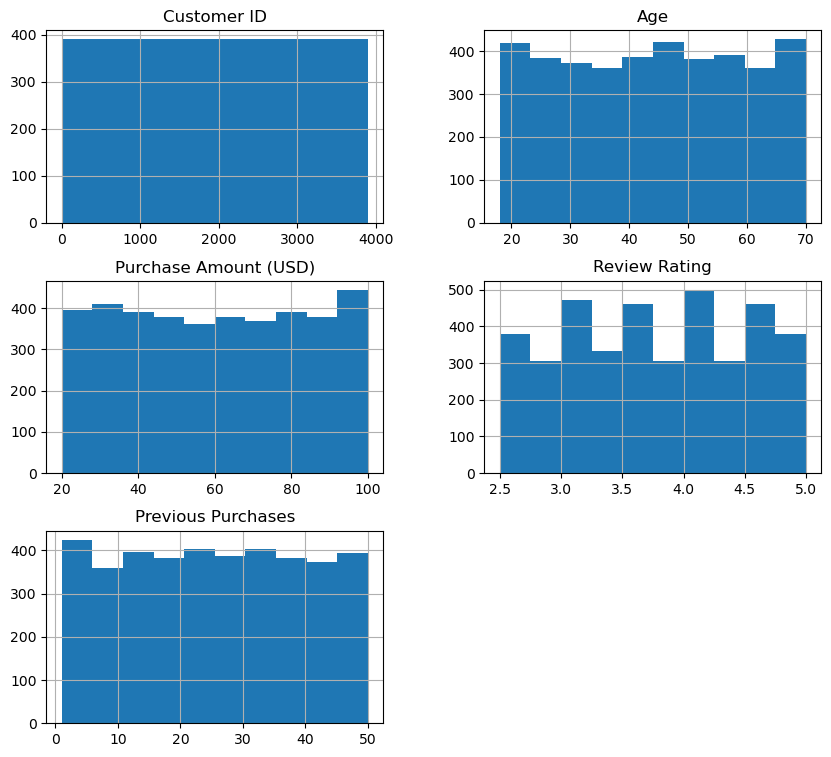

In [154]:
data.hist(figsize=(10,9))

In [155]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=2)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)

****************Training Data Shape********************

Training data-X- Shape:	 (2925, 7)

Training data-y- Shape:	 (2925, 1)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (975, 7)

Testing data(y-Outcome) Shape:	 (975, 1)


In [156]:
print(xtrain.columns)

Index(['Customer ID', 'Age', 'Gender', 'Purchase Amount (USD)',
       'Review Rating', 'Subscription Status', 'Previous Purchases'],
      dtype='object')


In [199]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Frequency of Purchases'] = label_encoder.fit_transform(data['Frequency of Purchases'])
data['Subscription Status'] = label_encoder.fit_transform(data['Subscription Status'])
data.head()

KeyError: 'Gender'

In [200]:

data = pd.get_dummies(data, columns=['Gender'], drop_first=True)  # One-hot encoding for 'Gender'
data['Subscription Status'] = data['Subscription Status'].apply(lambda x: 1 if x == 'Yes' else 0)  # Convert 'Subscription Status' to binary



KeyError: "None of [Index(['Gender'], dtype='object')] are in the [columns]"

In [201]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
print('*'*100)
print('Decison Tree Model')
print('*'*100)
print('\n Training Phase')
dt_clf.fit(xtrain,ytrain)
print('Hyperparameter:\n',dt_clf.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred=dt_clf.predict(xtest)
print('Predicted class labels for the test samples:\n',ypred)
print()
print('Testing completed')
print('='*100)

****************************************************************************************************
Decison Tree Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Training Completed

 Test Phase
Predicted class labels for the test samples:
 [4 4 2 2 1 4 5 5 3 0 4 5 0 6 3 0 6 6 4 1 5 5 2 2 5 5 3 0 3 5 2 5 3 6 4 2 3
 2 6 6 2 0 6 5 5 5 4 3 0 1 4 3 3 3 0 1 3 2 0 5 5 3 0 3 0 6 1 2 3 2 6 4 1 0
 4 1 6 1 2 5 5 6 2 0 1 6 5 4 0 2 3 3 3 1 1 5 3 4 6 0 2 2 2 3 2 2 4 4 0 5 0
 5 1 2 0 4 3 3 2 1 2 3 1 0 5 5 6 6 3 4 3 3 4 0 5 3 1 4 2 1 6 0 0 0 4 2 0 0
 3 2 1 3 5 0 0 1 0 0 3 5 6 1 6 4 2 6 4 4 5 1 0 2 6 3 1 0 1 3 3 6 1 4 2 4 3
 2 0 3 6 1 2 

In [202]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print('*'*100)
print('Decison Tree - Performance Measures')
print('*'*100)
print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print('='*100)
print('Confusion Matric:\n',confusion_matrix(ytest,ypred))
print('='*100)
print('Classification Report\n',classification_report(ytest,ypred))
print('='*100)

****************************************************************************************************
Decison Tree - Performance Measures
****************************************************************************************************
Accuracy Score:	 0.14743589743589744
Confusion Matric:
 [[23 21 20 16 10 25  6]
 [22  7 13 13 13 13 15]
 [21 10 15 21 12 15 15]
 [14 14 10 18 15 15 12]
 [18 15 26 20 15 15  8]
 [20 13 25 20 20 19 12]
 [12 15 22 17 13 13 18]]
Classification Report
               precision    recall  f1-score   support

           0       0.18      0.19      0.18       121
           1       0.07      0.07      0.07        96
           2       0.11      0.14      0.12       109
           3       0.14      0.18      0.16        98
           4       0.15      0.13      0.14       117
           5       0.17      0.15      0.16       129
           6       0.21      0.16      0.18       110

    accuracy                           0.15       780
   macro avg       0.15   

In [203]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(criterion='entropy')
print('*'*100)
print('Decison Tree Model')
print('*'*100)
print('\n Training Phase')
dt_clf.fit(xtrain,ytrain)
print('Hyperparameter:\n',dt_clf.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred=dt_clf.predict(xtest)
print('Predicted class labels for the test samples:\n',ypred)
print()
print('Testing completed')
print('='*100)


****************************************************************************************************
Decison Tree Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Training Completed

 Test Phase
Predicted class labels for the test samples:
 [0 4 2 5 1 4 6 0 5 0 4 3 5 6 1 1 3 6 5 1 3 6 6 4 6 0 6 4 4 3 3 3 6 5 6 2 0
 2 2 6 1 6 0 1 5 5 4 5 5 3 4 4 3 3 0 1 4 2 0 6 2 2 0 5 1 6 0 3 3 2 6 5 5 0
 4 0 0 5 2 6 3 6 2 5 2 4 6 4 0 3 2 4 2 2 0 3 3 6 6 0 5 4 6 3 3 6 4 6 0 5 0
 5 6 0 5 4 3 3 2 2 1 3 0 0 3 5 4 1 3 6 5 5 4 2 3 2 2 0 3 0 2 4 1 0 1 2 0 3
 4 2 2 3 1 0 0 4 4 0 3 6 5 5 2 4 1 5 4 4 4 2 0 1 3 0 0 3 2 1 3 6 6 0 1 4 0
 1 0 4 3 2

In [204]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print('*'*100)
print('Decison Tree - Performance Measures')
print('*'*100)
print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print('='*100)
print('Confusion Matric:\n',confusion_matrix(ytest,ypred))
print('='*100)
print('Classification Report\n',classification_report(ytest,ypred))
print('='*100)

****************************************************************************************************
Decison Tree - Performance Measures
****************************************************************************************************
Accuracy Score:	 0.15512820512820513
Confusion Matric:
 [[18 12 20 16 20 17 18]
 [20 12 17 14  9 11 13]
 [15 15 20 22 15 12 10]
 [ 8 13 13 14 16 18 16]
 [17 16 26 10 19 13 16]
 [20 20 14 13 22 19 21]
 [19 13 15 18 13 13 19]]
Classification Report
               precision    recall  f1-score   support

           0       0.15      0.15      0.15       121
           1       0.12      0.12      0.12        96
           2       0.16      0.18      0.17       109
           3       0.13      0.14      0.14        98
           4       0.17      0.16      0.16       117
           5       0.18      0.15      0.16       129
           6       0.17      0.17      0.17       110

    accuracy                           0.16       780
   macro avg       0.15   

In [205]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

features = data.drop(['Age','Purchase Amount (USD)','Subscription Status','Previous Purchases','Frequency of Purchases'], axis=1)
target_sales = data['Review Rating']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target_sales, test_size=0.2, random_state=42)

# Initialize the decision tree regression model
regression_model = DecisionTreeRegressor(random_state=42)

# Train the regression model
regression_model.fit(X_train, y_train)

# Predict sales for the test set
predictions = regression_model.predict(X_test)

In [206]:
#Calculate mean squared error
mse = mean_squared_error(y_test, predictions)

# Calculate R-squared
r_squared = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r_squared}')

Mean Squared Error: 2.583620600612304e-29
R-squared: 1.0


In [207]:
#Max depth
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid={ 'max_depth':[None,3,4,5,6,7,8,10]}
clf=DecisionTreeClassifier(criterion='entropy')
grid_search=GridSearchCV(clf,param_grid,cv=5)
grid_search.fit(xtrain,ytrain)
best_max_depth=grid_search.best_params_['max_depth']
print(best_max_depth)

3


In [208]:
grid_search.best_params_

{'max_depth': 3}

In [209]:
grid_search.cv_results_

{'mean_fit_time': array([0.02668138, 0.00312438, 0.00624852, 0.00624881, 0.00313134,
        0.00624228, 0.00937901, 0.01475263]),
 'std_fit_time': array([0.00326025, 0.00624876, 0.00765285, 0.0076532 , 0.00626268,
        0.00764521, 0.00765793, 0.00386638]),
 'mean_score_time': array([0.        , 0.        , 0.        , 0.00312438, 0.00312433,
        0.00312319, 0.        , 0.        ]),
 'std_score_time': array([0.        , 0.        , 0.        , 0.00624876, 0.00624866,
        0.00624638, 0.        , 0.        ]),
 'param_max_depth': masked_array(data=[None, 3, 4, 5, 6, 7, 8, 10],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': None},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': 7},
  {'max_depth': 8},
  {'max_depth': 10}],
 'split0_test_score': array([0.15224359, 0.15705128, 0.15705128, 0.14903846, 0.13621795,
        0.139

In [210]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [211]:
from sklearn import tree
tree.plot_tree(dt_clf)


[Text(0.40932330875820766, 0.9827586206896551, 'x[4] <= 21.5\nentropy = 2.807\nsamples = 3120\nvalue = [451, 451, 475, 444, 436, 434, 429]'),
 Text(0.14035167224226466, 0.9482758620689655, 'x[0] <= 21.5\nentropy = 2.797\nsamples = 1322\nvalue = [202, 206, 227, 175, 179, 152, 181]'),
 Text(0.017308833725757207, 0.9137931034482759, 'x[1] <= 31.5\nentropy = 2.68\nsamples = 109\nvalue = [25, 11, 23, 20, 13, 10, 7]'),
 Text(0.006616248665432061, 0.8793103448275862, 'x[4] <= 14.5\nentropy = 1.611\nsamples = 14\nvalue = [3, 2, 8, 0, 0, 0, 1]'),
 Text(0.005475516136909292, 0.8448275862068966, 'x[2] <= 3.85\nentropy = 1.53\nsamples = 9\nvalue = [3, 2, 4, 0, 0, 0, 0]'),
 Text(0.004562930114091077, 0.8103448275862069, 'x[2] <= 3.15\nentropy = 1.371\nsamples = 5\nvalue = [3, 1, 1, 0, 0, 0, 0]'),
 Text(0.0041066371026819695, 0.7758620689655172, 'x[0] <= 19.0\nentropy = 1.0\nsamples = 2\nvalue = [0, 1, 1, 0, 0, 0, 0]'),
 Text(0.0036503440912728615, 0.7413793103448276, 'entropy = 0.0\nsamples = 1\nva

Error in callback <function flush_figures at 0x00000224D7DD4860> (for post_execute):


KeyboardInterrupt: 

In [215]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(criterion='entropy',max_depth=2)
print('*'*100)
print('Decison Tree Model')
print('*'*100)
print('\n Training Phase')
dt_clf.fit(xtrain,ytrain)
print('Hyperparameter:\n',dt_clf.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred=dt_clf.predict(xtest)
print('Predicted class labels for the test samples:\n',ypred)
print()
print('Testing completed')
print('='*100)

****************************************************************************************************
Decison Tree Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 2, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Training Completed

 Test Phase
Predicted class labels for the test samples:
 [2 2 2 5 2 5 2 5 2 5 0 2 2 2 2 0 2 2 2 0 5 5 2 2 2 5 5 2 2 2 2 2 2 2 2 2 5
 2 2 2 2 2 2 2 5 5 5 2 2 2 2 5 5 2 2 5 5 2 5 2 5 2 2 2 5 2 0 2 2 2 2 2 2 2
 2 2 5 2 2 2 5 2 2 5 2 2 2 5 2 2 2 2 2 2 5 2 5 2 2 2 0 2 2 2 2 2 2 2 2 5 2
 2 5 5 2 2 0 2 5 2 2 5 0 5 5 2 2 2 2 5 2 2 2 2 5 5 2 2 2 5 2 2 2 2 2 2 2 2
 5 5 5 5 2 5 2 2 2 5 2 2 2 5 5 5 2 2 2 2 2 2 5 2 2 2 2 2 2 2 5 2 2 2 2 5 2
 2 5 5 5 2 2 

In [213]:
#import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print('*'*100)
print('Decison Tree - Performance Measures')
print('*'*100)
print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print('='*100)
print('Confusion Matric:\n',confusion_matrix(ytest,ypred))
print('='*100)
print('Classification Report\n',classification_report(ytest,ypred))
print('='*100)

****************************************************************************************************
Decison Tree - Performance Measures
****************************************************************************************************
Accuracy Score:	 0.1423076923076923
Confusion Matric:
 [[ 4  0 90  0  0 27  0]
 [ 5  0 64  0  0 27  0]
 [ 3  0 74  0  0 32  0]
 [ 5  0 71  0  0 22  0]
 [ 4  0 85  0  0 28  0]
 [ 7  0 89  0  0 33  0]
 [ 3  0 73  0  0 34  0]]
Classification Report
               precision    recall  f1-score   support

           0       0.13      0.03      0.05       121
           1       0.00      0.00      0.00        96
           2       0.14      0.68      0.23       109
           3       0.00      0.00      0.00        98
           4       0.00      0.00      0.00       117
           5       0.16      0.26      0.20       129
           6       0.00      0.00      0.00       110

    accuracy                           0.14       780
   macro avg       0.06    

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(0.5, 0.8333333333333334, 'x[4] <= 21.5\nentropy = 2.807\nsamples = 3120\nvalue = [451, 451, 475, 444, 436, 434, 429]'),
 Text(0.25, 0.5, 'x[0] <= 21.5\nentropy = 2.797\nsamples = 1322\nvalue = [202, 206, 227, 175, 179, 152, 181]'),
 Text(0.125, 0.16666666666666666, 'entropy = 2.68\nsamples = 109\nvalue = [25, 11, 23, 20, 13, 10, 7]'),
 Text(0.375, 0.16666666666666666, 'entropy = 2.798\nsamples = 1213\nvalue = [177, 195, 204, 155, 166, 142, 174]'),
 Text(0.75, 0.5, 'x[2] <= 3.55\nentropy = 2.806\nsamples = 1798\nvalue = [249, 245, 248, 269, 257, 282, 248]'),
 Text(0.625, 0.16666666666666666, 'entropy = 2.79\nsamples = 742\nvalue = [103, 103, 88, 121, 99, 139, 89]'),
 Text(0.875, 0.16666666666666666, 'entropy = 2.806\nsamples = 1056\nvalue = [146, 142, 160, 148, 158, 143, 159]')]

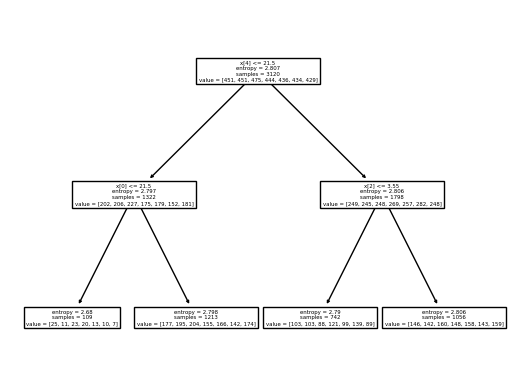

In [214]:
tree.plot_tree(dt_clf)